<a href="https://colab.research.google.com/github/caganze/DemoDSFP/blob/master/Matplotlib_Tutorial_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Plots in Python
----------------------------------
CA, May 22nd 2021

Hi everyone,

Today's tutorial is going to be on how to get started  with basic plotting in Python <br>

Here is the outline:
- Most common plots
   - Line & step plots
   - Scatter plots & displaying uncertainty
   - Histograms (displaying distributions)

- Using colors

- Subplots

- Matplotlib & plotting styles

- Advanced plots using seaborn 

- References


 
First, we are going to import matplotlib, and use a dataset from a library called seabron.
<br> Additionally, we will use some other basic python modules like numpy for mathematical manipulation of our data. You probably saw these libraries in the previous tutorial <br>

There are many other plotting libraries in python e.g arviz, altair, bokeh but I'll stick to matplotlib and seaborn 
    
If you don't have seaborn installed type the command `pip install seaborn` in your terminal

Link to functions that we will be using in this tutorial: <br>
axes.plot https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html <br>
axes.step https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.step.html <br>
axes.scatter https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html <br>
axes.errorbar https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html <br>
axes.hist https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html <br>
axes.hist2d https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist2d.html <br>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#use this command to get plots directly in your notebook
%matplotlib inline

#use this command to for a more interactive plot
#%matplotlib notebook

Let's load some data from the iris dataset  
![image.png](attachment:image.png)

In [ ]:
#get the data 
data=sns.load_dataset('iris')

In [ ]:
#previe25 this table
data.head(5) 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Part 1. Most Common Plots
- Line Plots



[Text(0, 0.5, 'Petal width'), Text(0.5, 0, 'Sepal Length')]

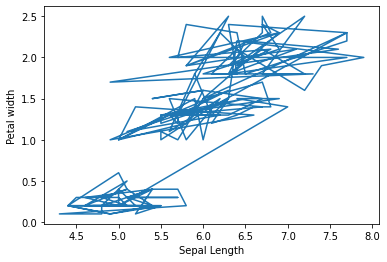

In [ ]:
fig, ax=plt.subplots() 
#here we are creating python objects named fig and ax 
ax.plot(data.sepal_length, data.petal_width) 
#add points to the ax object not the fig object
ax.set(xlabel='Sepal Length', ylabel='Petal width') 
#set properties of the axes
#plt.savefig() save figure

In [ ]:
#Exercise: change the line size

- Step Plots

[Text(0, 0.5, 'Petal width'), Text(0.5, 0, 'Sepal Length')]

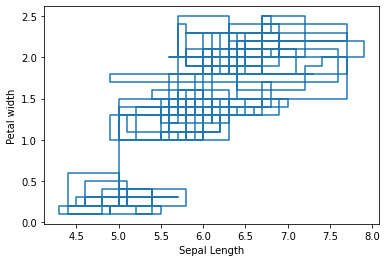

In [ ]:
#similar syntax, except we are now using .step
fig, ax=plt.subplots() 
ax.step(data.sepal_length, data.petal_width)  
ax.set(xlabel='Sepal Length', ylabel='Petal width')

In [ ]:
#Exercise: change the line style

- Scatter Plots

[Text(0, 0.5, 'Petal width'), Text(0.5, 0, 'Sepal Length')]

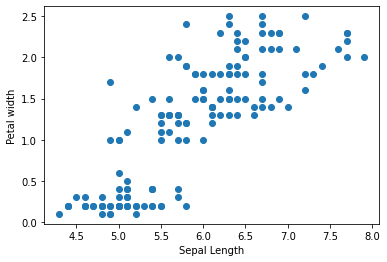

In [ ]:
#similar syntax, except we are now using .scatter
fig, ax=plt.subplots()
ax.scatter(data.sepal_length, data.petal_width) 
ax.set(xlabel='Sepal Length', ylabel='Petal width') 

In [ ]:
#exercise: plot these with rectangles as markers, increase the fontsize

- Displaying Uncertanties

Since there are no uncertanities in these data, let's make up our own <br>

let's choose uncertainties= 10% times data

In [ ]:
#let's use a for loop to populate our dataframe  with new columns
for column in ['sepal_length','sepal_width', 'petal_length', 'petal_width']:
    err_column=column+'_er'
    data[err_column]= 0.1*data[column].values

In [ ]:
#let's preview the data to check if these columns were added 
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_er,sepal_width_er,petal_length_er,petal_width_er
0,5.1,3.5,1.4,0.2,setosa,0.51,0.35,0.14,0.02
1,4.9,3.0,1.4,0.2,setosa,0.49,0.30,0.14,0.02
2,4.7,3.2,1.3,0.2,setosa,0.47,0.32,0.13,0.02
3,4.6,3.1,1.5,0.2,setosa,0.46,0.31,0.15,0.02
4,5.0,3.6,1.4,0.2,setosa,0.50,0.36,0.14,0.02


[Text(0, 0.5, 'Petal width'), Text(0.5, 0, 'Sepal Length')]

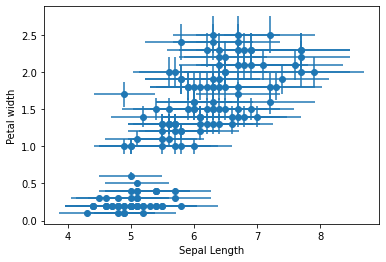

In [ ]:
#similar syntax
fig, ax=plt.subplots()
ax.errorbar(data.sepal_length,  data.petal_width,
            xerr= data.sepal_length_er, yerr=data.petal_width_er, fmt='o') 
ax.set(xlabel='Sepal Length', ylabel='Petal width') 

In [ ]:
#exercise: increase the size of the uncertainty bars

- 1D-Histograms

[Text(0, 0.5, 'Number'), Text(0.5, 0, 'Sepal Length')]

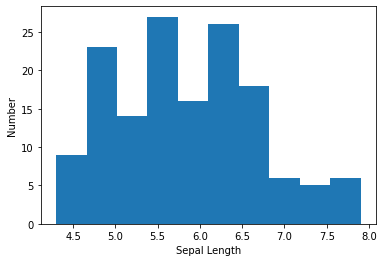

In [ ]:
#syntax
fig, ax=plt.subplots() 
binedges=ax.hist(data.sepal_length) 
ax.set(xlabel='Sepal Length', ylabel='Number') 

In [ ]:
#returns the number of object per bin bins and bin edges and BarContainer object
binedges

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

In [ ]:
#exercise: change the number of bins, is this a better plot?

- 2D-Histograms

[Text(0, 0.5, 'Number ')]

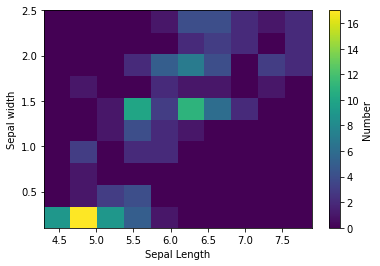

In [ ]:
#same syntax as 1d-histograms
fig, ax=plt.subplots() 
h=ax.hist2d(data.sepal_length, data.petal_width)
ax.set(xlabel='Sepal Length', ylabel='Sepal width')
#we can add a color bar 
cbar=fig.colorbar(h[-1], ax=ax, orientation='vertical')
cbar.ax.set(ylabel='Number ')

In [ ]:
#exercise: adjust the number of bins, what's the optimal number of bins ?

#### Part 3. Using Colors 

Let's subdivide our data set by species 



In [ ]:
#how many species of flowers are there in this set?
np.unique(data.species) #use numpy (another python library)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
#divide our pandas dataframe into three dataframes
setosa_data=data[data.species=='setosa']
virginica_data=data[data.species== 'virginica']
versicolor_data=data[data.species=='versicolor']

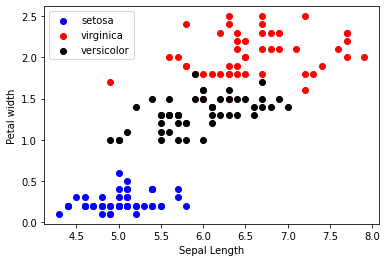

In [ ]:
#plot the same scatter plot ith different colors
fig, ax=plt.subplots() 

ax.scatter(setosa_data.sepal_length, setosa_data.petal_width,\
           color='blue', label='setosa') 

ax.scatter(virginica_data.sepal_length, virginica_data.petal_width,
            color='red', label='virginica') 

ax.scatter(versicolor_data.sepal_length, versicolor_data.petal_width, 
           color='black', label='versicolor') 

ax.set(xlabel='Sepal Length', ylabel='Petal width') 
#add a legend
legnd=ax.legend() 

In [ ]:
#exercise: plot histograms of sepal length for these three species

Numerical colors and colormaps <br>
https://matplotlib.org/stable/tutorials/colors/colormaps.html

Sometimes colors can be used to represent a new dimension of the data


[Text(0, 0.5, 'Sepal width ')]

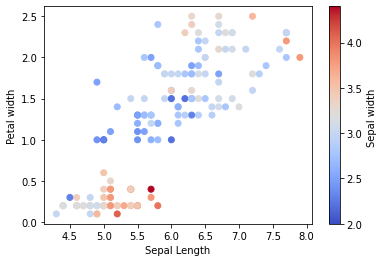

In [ ]:
fig, ax=plt.subplots() 
c=ax.scatter(data.sepal_length, data.petal_width,\
           c=data.sepal_width.values, cmap='coolwarm') 
ax.set(xlabel='Sepal Length', ylabel='Petal width') 
cbar=plt.colorbar(c)
cbar.ax.set(ylabel='Sepal width ')

#### Part 4. Subplots 

Subplots are useful for combining multiple plots in one figure <br>
Here is how I typically use them

Link to documentation
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

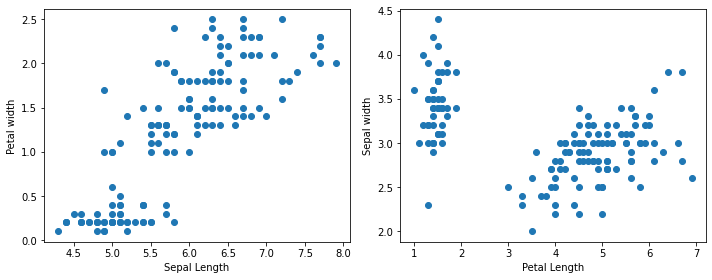

In [ ]:
fig, ax=plt.subplots(ncols=2, figsize=(10, 4))  #I'm also adjusting the size of the figure
#ax is now a list of 2 axes objects
ax[0].scatter(data.sepal_length, data.petal_width) 
ax[0].set(xlabel='Sepal Length', ylabel='Petal width') 

ax[1].scatter(data.petal_length, data.sepal_width) 
ax[1].set(xlabel='Petal Length', ylabel='Sepal width')

plt.tight_layout()#command to clean up

In [ ]:
#exercise: do a 4 by 4 subplots and plot every combination of columns

#### Part 4. Styling, ticks, grids, fontsize etc.

Let's add ticks and a grid

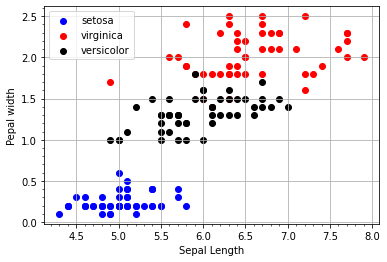

In [ ]:
fig, ax=plt.subplots() 

ax.scatter(setosa_data.sepal_length, setosa_data.petal_width,\
           color='blue', label='setosa') 

ax.scatter(virginica_data.sepal_length, virginica_data.petal_width,
            color='red', label='virginica') 

ax.scatter(versicolor_data.sepal_length, versicolor_data.petal_width, 
           color='black', label='versicolor') 

ax.set(xlabel='Sepal Length', ylabel='Pepal width') 

#add a legend
legnd=ax.legend() 

#add minorticks
ax.minorticks_on()
#add grid on major ticks
ax.grid()

Using colors is not always the best thing to do, it can be misleading e.g our interperation of "red" vs "blue". <br>
It's better to visualize every plot in greyscale first then add colors later

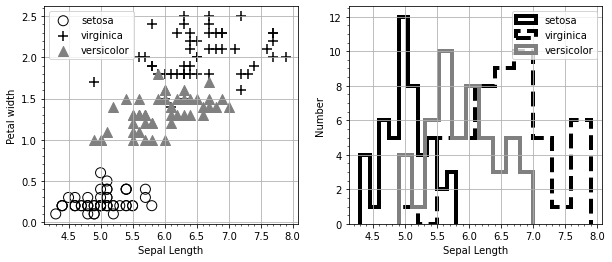

In [ ]:
fig, ax=plt.subplots(ncols=2, figsize=(10, 4)) 

############################ SCATTER PLOTS ###################################
ax[0].scatter(setosa_data.sepal_length, setosa_data.petal_width,\
            label='setosa',  marker='o', color='None', edgecolor='black', s=100)

ax[0].scatter(virginica_data.sepal_length, virginica_data.petal_width,
             label='virginica',  marker='+', \
              color='black', edgecolor='black', s=100)

ax[0].scatter(versicolor_data.sepal_length, versicolor_data.petal_width, label='versicolor', \
              color='grey', marker='^', edgecolor='grey', s=100)

ax[0].set(xlabel='Sepal Length', ylabel='Petal width') 

############################ HISTOGRAMS ###################################
ax[1].hist(setosa_data.sepal_length, histtype='step', lw=4, color='black', \
           label='setosa')

ax[1].hist(virginica_data.sepal_length,  histtype='step', lw=4, linestyle='--', \
           color='black', label='virginica')

ax[1].hist(versicolor_data.sepal_length,  histtype='step', lw=4, color='grey', \
          label='versicolor')

ax[1].set(xlabel='Sepal Length', ylabel='Number') 

for a in ax:
    #add a legend add legend and grid for both axes
    legnd=a.legend()
    a.minorticks_on()
    a.grid()

There are some more elegant matploltib default plotting styles

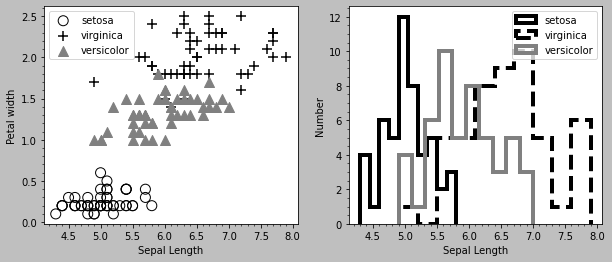

In [ ]:
#this command applies the grayscale style in this cell
with plt.style.context("grayscale"): 
    
    fig, ax=plt.subplots(ncols=2, figsize=(10, 4)) 

    ############################ SCATTER PLOTS ###################################
    ax[0].scatter(setosa_data.sepal_length, setosa_data.petal_width,\
                label='setosa',  marker='o', color='None', edgecolor='black', s=100)

    ax[0].scatter(virginica_data.sepal_length, virginica_data.petal_width,
                 label='virginica',  marker='+', \
                  color='black', edgecolor='black', s=100)

    ax[0].scatter(versicolor_data.sepal_length, versicolor_data.petal_width, label='versicolor', \
                  color='grey', marker='^', edgecolor='grey', s=100)

    ax[0].set(xlabel='Sepal Length', ylabel='Petal width') 

    ############################ HISTOGRAMS ###################################
    ax[1].hist(setosa_data.sepal_length, histtype='step', lw=4, color='black', \
               label='setosa')

    ax[1].hist(virginica_data.sepal_length,  histtype='step', lw=4, linestyle='--', \
               color='black', label='virginica')

    ax[1].hist(versicolor_data.sepal_length,  histtype='step', lw=4, color='grey', \
              label='versicolor')

    ax[1].set(xlabel='Sepal Length', ylabel='Number') 

    for a in ax:
        #add a legend add legend and grid for both axes
        legnd=a.legend()
        a.minorticks_on()
        #a.grid()

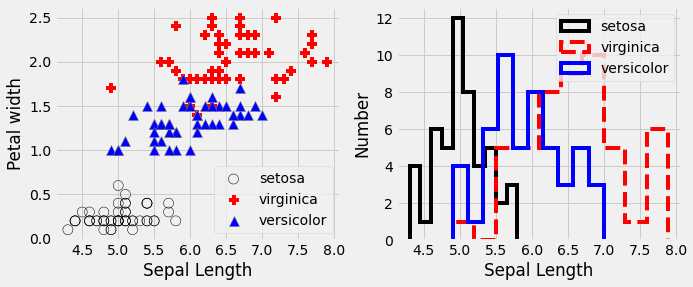

In [ ]:
#five thirty eight style 
with plt.style.context("fivethirtyeight"):
    fig, ax=plt.subplots(ncols=2, figsize=(10, 4)) 

    ############################ SCATTER PLOTS ###################################
    ax[0].scatter(setosa_data.sepal_length, setosa_data.petal_width,\
                label='setosa',  marker='o', color='None', edgecolor='black', s=100)

    ax[0].scatter(virginica_data.sepal_length, virginica_data.petal_width,
                 label='virginica',  marker='+', \
                  color='red', edgecolor='black', s=100)

    ax[0].scatter(versicolor_data.sepal_length, versicolor_data.petal_width, label='versicolor', \
                  color='blue', marker='^', edgecolor='grey', s=100)

    ax[0].set(xlabel='Sepal Length', ylabel='Petal width') 

    ############################ HISTOGRAMS ###################################
    ax[1].hist(setosa_data.sepal_length, histtype='step', lw=4, color='black', \
               label='setosa')

    ax[1].hist(virginica_data.sepal_length,  histtype='step', lw=4, linestyle='--', \
               color='red', label='virginica')

    ax[1].hist(versicolor_data.sepal_length,  histtype='step', lw=4, color='blue', \
              label='versicolor')

    ax[1].set(xlabel='Sepal Length', ylabel='Number') 

    for a in ax:
        #add a legend add legend and grid for both axes
        legnd=a.legend()
        a.minorticks_on()
        #a.grid()

#### Part 5 Advanced Plotting using Seaborn & Arviz 

Seaborn Gallery https://seaborn.pydata.org/examples/index.html <br>
Arviz Gallery https://arviz-devs.github.io/arviz/examples/index.html

Seaborn aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html

- Box plots

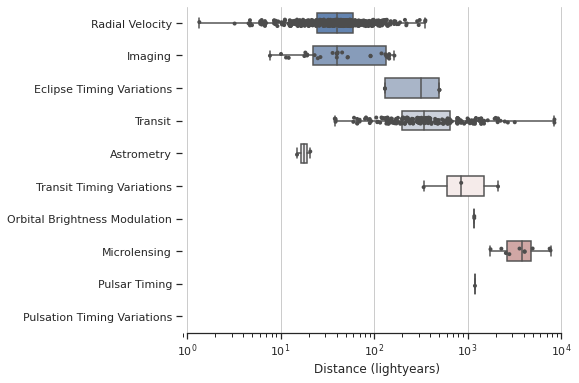

In [ ]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset (different from the iris dataset)
#source https://exoplanets.nasa.gov/discovery/exoplanet-catalog/
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel='Distance (lightyears)')
sns.despine(trim=True, left=True)

- Heat maps

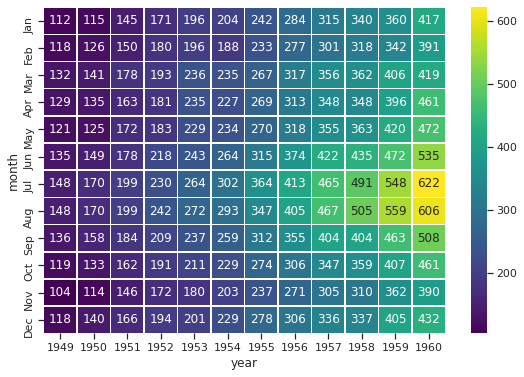

In [ ]:

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='viridis')

References: <br>
    - Matplotlib documentation <br>
    - Seaborn documentation <br> 
    - Adam Miller: salience with matplotlib https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/master/Session12/Day1/SalienceInMatplotlibSolutions.ipynb <br>
    